### WordCloud 시각화.

In [1]:
# 설치 필요.
# !pip install wordcloud

In [2]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

In [3]:
f = open(r"data\book_three_little_pigs.txt",'r',encoding='UTF8')
my_book = f.readlines()
f.close()

#### 1. 전처리.

In [4]:
n_min = 4                                                           # 단어의 최소 길이. 
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # 특수 문자를 space로 대체.
    pre = re.sub(r'\d+','', pre)                                    # 숫자 삭제.
    pre = nltk.word_tokenize(pre)                                   # 단어로 토큰화.
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 적용.
    pre = [x.lower() for x in pre]                                  # 소문자화.
    pre = [x for x in pre if x not in stopwords.words('english')]   # 불용어 삭제.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # 말뭉치로 추가.

In [5]:
len(corpus)

184

#### 2. Word Cloud 기본형.

In [6]:
# WordCloud 는 입력으로 긴 문자열 하나를 받을 수 있다.
a_long_sentence = ' '.join(corpus)

In [7]:
wc = WordCloud(background_color='white', max_words=30)              # 출력 커스터마이징.
wc.generate(a_long_sentence)
# wc.words_                                                          # Top 단어 확인.                                                        

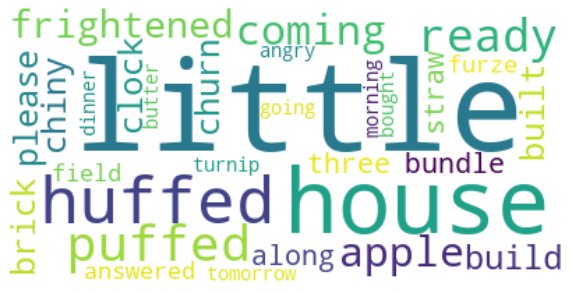

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Axes를 꺼둠.
plt.show()

#### 3. Mask 적용한 Word Cloud.

In [11]:
# 백드라운드 mask 선택.
#img = Image.open(r'data\background_1.png')                    # 타원.
#img = Image.open(r'data\background_2.png')                   # 말풍선.
#img = Image.open(r'data\background_3.png')                    # 하트.
img = Image.open(r'data\background_4.png')                    # 원.
back_mask = np.array(img)

In [12]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # 출력 커스터마이징. 
wc.generate(a_long_sentence) 

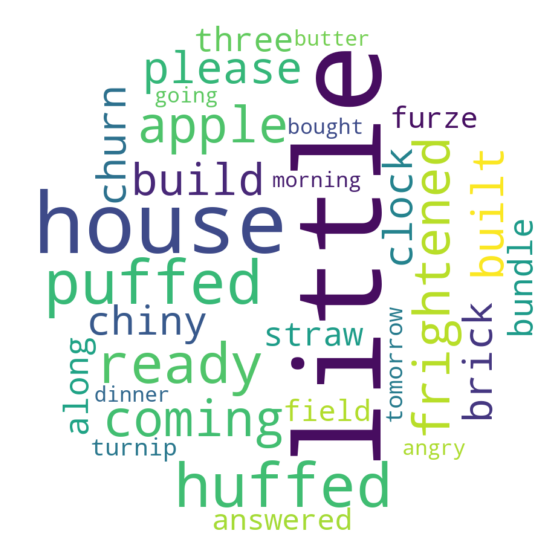

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Axes를 꺼둠.
plt.savefig("out.png")                             # 외부 파일로 저장.  
plt.show()